# Overfitting Problem
#### Here you need to create a model that overfits, then use different methods to avoid it

### Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Generate Sample Data

In [2]:
# This function generates random data for 2 different classes

# np.random.seed(0xdeadbeef)

def make_sample(nexamples, means=([0.,0.],[1.,1.]), sigma=1.):
    normal = np.random.multivariate_normal
    # squared width:
    s2 = sigma**2.
    # below, we provide the coordinates of the mean as 
    # a first argument, and then the covariance matrix
    # which describes the width of the Gaussian along the 
    # two directions.
    # we generate nexamples examples for each category
    sgx0 = normal(means[0], [[s2, 0.], [0.,s2]], nexamples)
    sgx1 = normal(means[1], [[s2, 0.], [0.,s2]], nexamples)
    # setting the labels for each category
    sgy0 = np.zeros((nexamples,))
    sgy1 = np.ones((nexamples,))
    sgx = np.concatenate([sgx0,sgx1])
    sgy = np.concatenate([sgy0,sgy1])
    return sgx, sgy

In [3]:
# Don't change the number of samples for your first model.
# After that (For your second model) you can play with the numbers to see how increasing your dataset helps to avoid overfitting

sgx, sgy = make_sample(30)

Text(0, 0.5, 'x2')

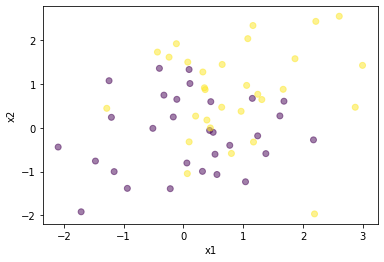

In [4]:
# note how the two categories are plotted
# together in one go by providing the 
# label array as color argument (c=sgy)

plt.scatter(sgx[:,0], sgx[:,1], alpha=0.5, c=sgy)
plt.xlabel('x1')
plt.ylabel('x2')

### Import Keras

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy

### Create a model that overfits

In [11]:
batch_size = 128

In [14]:
# Create a Sequential MLP model with these Dense layers:
# 3 hidden layers with 50 units each and 'relu' activation
# 1 unit output with 'softmax' activation


########################
## PUT YOUR CODE HERE ##
########################
input_shape = sgx[0].shape
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=input_shape))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                150       
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 5,301
Trainable params: 5,301
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Split your dataset to test and train with your desired implementation
# use sklearn.model_selection.train_test_split


########################
## PUT YOUR CODE HERE ##
########################
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(sgx, sgy, test_size=0.3)
m = x_train.shape[0]

In [9]:
# Compile with your desired optimizer and loss function with 'accuracy' as metric
# Don't forget to monitor the overfitting, you should take care of val_accuracy and val_loss

########################
## PUT YOUR CODE HERE ##
########################

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [10]:
# Start training and fit your model with desired parameters and validation_split=0.2

########################
## PUT YOUR CODE HERE ##
########################
history = model.fit(
    x_train, y_train,
    batch_size=64,
    epochs=3000,
    validation_split=0.2,
    verbose=1
)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 34ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 2.2232 - val_accuracy: 0.7778
Epoch 502/3000
1/1 [==============================] - 0s 34ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 2.2257 - val_accuracy: 0.7778
Epoch 503/3000
1/1 [==============================] - 0s 35ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 2.2276 - val_accuracy: 0.7778
Epoch 504/3000
1/1 [==============================] - 0s 37ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 2.2289 - val_accuracy: 0.7778
Epoch 505/3000
1/1 [==============================] - 0s 38ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 2.2301 - val_accuracy: 0.7778
Epoch 506/3000
1/1 [==============================] - 0s 50ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 2.2313 - val_accuracy: 0.7778
Epoch 507/3000
1/1 [==============================] - 0s 33ms/step - loss: 0.0022 - accuracy: 1.0000 - val

### Plot Your Results

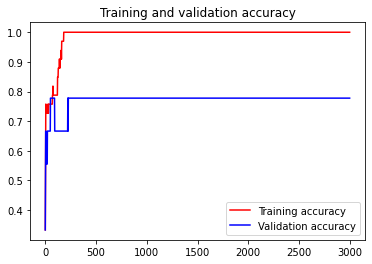

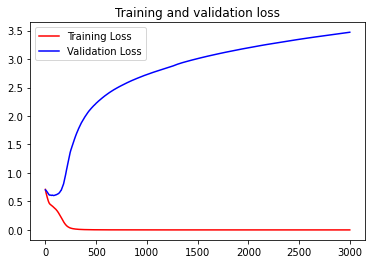

In [11]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Evaluate your model

In [12]:
# Evaluate your model with train and test data


########################
## PUT YOUR CODE HERE ##
########################
loss, acc = model.evaluate(
    x_train, y_train, batch_size=64, verbose=1
)
test_loss, test_acc = model.evaluate(
    x_test, y_test, batch_size=64, verbose=1
)
print(f"Train Loss: {loss}, Train Accuracy: {acc}")
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

1/1 [==============================] - 0s 31ms/step - loss: 5.5165 - accuracy: 0.6667
Train Loss: 0.7436507344245911, Train Accuracy: 0.9523809552192688
Test Loss: 5.516526222229004, Test Accuracy: 0.6666666865348816


# Now you need to use your knowledge and methods (Regularization, Dropout, etc) to prevent overfitting and then evaluate and compare your results

In [23]:
def compile_and_fit(model, x_train, y_train, callbacks=None, epochs=3000):
    model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
    )
    history = model.fit(
        x_train, y_train,
        batch_size=batch_size,
        epochs=epochs,
        validation_split=0.2,
        verbose=1,
        shuffle=True,
        callbacks=callbacks
    )
    return history

In [16]:
def evaluate(model, x_train, y_train, x_test, y_test):
    loss, acc = model.evaluate(
    x_train, y_train, batch_size=batch_size, verbose=1
    )
    test_loss, test_acc = model.evaluate(
        x_test, y_test, batch_size=batch_size, verbose=1
    )
    print(f"Train Loss: {loss}, Train Accuracy: {acc}")
    print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

In [17]:
def plot_loss_accuracy(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'r', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'r', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

## Use Simpler Model

In [32]:
simple_model = Sequential()
simple_model.add(Dense(10, activation='relu', input_shape=input_shape))
simple_model.add(Dense(1, activation='sigmoid'))

simple_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                30        
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [33]:
history = compile_and_fit(simple_model, x_train, y_train, None, 500)

Epoch 1/500
1/1 [==============================] - 1s 585ms/step - loss: 0.6652 - accuracy: 0.6667 - val_loss: 0.6985 - val_accuracy: 0.5556
Epoch 2/500
1/1 [==============================] - 0s 28ms/step - loss: 0.6635 - accuracy: 0.6667 - val_loss: 0.6962 - val_accuracy: 0.6667
Epoch 3/500
1/1 [==============================] - 0s 27ms/step - loss: 0.6619 - accuracy: 0.6667 - val_loss: 0.6939 - val_accuracy: 0.6667
Epoch 4/500
1/1 [==============================] - 0s 27ms/step - loss: 0.6602 - accuracy: 0.6667 - val_loss: 0.6916 - val_accuracy: 0.6667
Epoch 5/500
1/1 [==============================] - 0s 27ms/step - loss: 0.6585 - accuracy: 0.6970 - val_loss: 0.6894 - val_accuracy: 0.6667
Epoch 6/500
1/1 [==============================] - 0s 27ms/step - loss: 0.6569 - accuracy: 0.6970 - val_loss: 0.6872 - val_accuracy: 0.6667
Epoch 7/500
1/1 [==============================] - 0s 30ms/step - loss: 0.6552 - accuracy: 0.6970 - val_loss: 0.6850 - val_accuracy: 0.6667
Epoch 8/500
1/1 [==

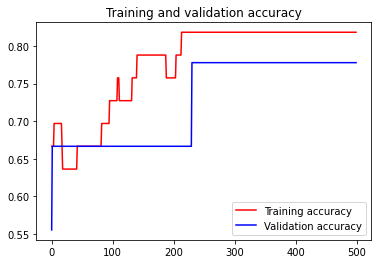

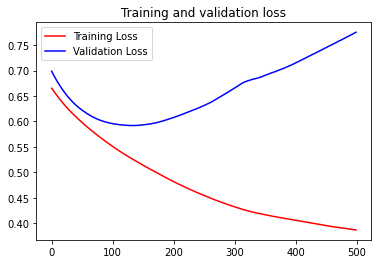

In [34]:
plot_loss_accuracy(history)

In [35]:
evaluate(simple_model, x_train, y_train, x_test, y_test)

1/1 [==============================] - 0s 19ms/step - loss: 0.5339 - accuracy: 0.7778
Train Loss: 0.47026756405830383, Train Accuracy: 0.8095238208770752
Test Loss: 0.5339462757110596, Test Accuracy: 0.7777777910232544


## More Training Data

In [86]:
x_train_1, y_train_1 = make_sample(500, ([0.,0],[2.,2.]))
x_test_1, y_test_1 = make_sample(100, ([0.,0],[2.,2.]))

Text(0, 0.5, 'x2')

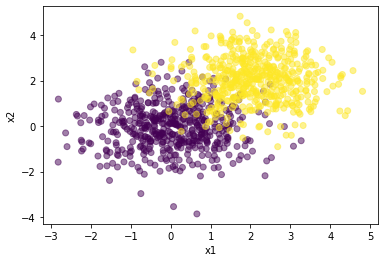

In [87]:
plt.scatter(x_train_1[:,0], x_train_1[:,1], alpha=0.5, c=y_train_1)
plt.xlabel('x1')
plt.ylabel('x2')

In [72]:
model_0 = Sequential()
model_0.add(Dense(50, activation='relu', input_shape=input_shape))
model_0.add(Dense(50, activation='relu'))
model_0.add(Dense(50, activation='relu'))
model_0.add(Dense(1, activation='sigmoid'))

model_0.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 50)                150       
                                                                 
 dense_37 (Dense)            (None, 50)                2550      
                                                                 
 dense_38 (Dense)            (None, 50)                2550      
                                                                 
 dense_39 (Dense)            (None, 1)                 51        
                                                                 
Total params: 5,301
Trainable params: 5,301
Non-trainable params: 0
_________________________________________________________________


In [73]:
history = compile_and_fit(model_0, x_train_1, y_train_1)

Streaming output truncated to the last 5000 lines.
13/13 [==============================] - 0s 5ms/step - loss: 0.1652 - accuracy: 0.9237 - val_loss: 0.2478 - val_accuracy: 0.8700
Epoch 502/3000
13/13 [==============================] - 0s 8ms/step - loss: 0.1651 - accuracy: 0.9200 - val_loss: 0.2749 - val_accuracy: 0.8500
Epoch 503/3000
13/13 [==============================] - 0s 5ms/step - loss: 0.1644 - accuracy: 0.9200 - val_loss: 0.2248 - val_accuracy: 0.8700
Epoch 504/3000
13/13 [==============================] - 0s 5ms/step - loss: 0.1634 - accuracy: 0.9262 - val_loss: 0.3021 - val_accuracy: 0.8400
Epoch 505/3000
13/13 [==============================] - 0s 6ms/step - loss: 0.1654 - accuracy: 0.9237 - val_loss: 0.2452 - val_accuracy: 0.8700
Epoch 506/3000
13/13 [==============================] - 0s 5ms/step - loss: 0.1691 - accuracy: 0.9175 - val_loss: 0.2229 - val_accuracy: 0.8750
Epoch 507/3000
13/13 [==============================] - 0s 5ms/step - loss: 0.1641 - accuracy: 0.927

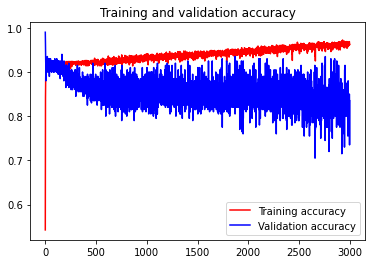

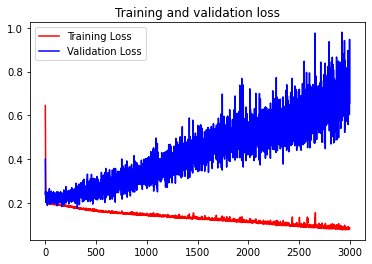

In [74]:
plot_loss_accuracy(history)

In [93]:
evaluate(model_0, x_train_1, y_train_1, x_test_1, y_test_1)

2/2 [==============================] - 0s 8ms/step - loss: 0.3084 - accuracy: 0.9050
Train Loss: 0.6224902272224426, Train Accuracy: 0.8920000195503235
Test Loss: 0.3084014356136322, Test Accuracy: 0.9049999713897705


## Add Dropout

In [88]:
from keras.layers import Dropout

model_1 = Sequential()
model_1.add(Dense(20, activation='relu', input_shape=input_shape))
model_1.add(Dropout(0.5))
model_1.add(Dense(20, activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Dense(1, activation='sigmoid'))

model_1.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 20)                60        
                                                                 
 dropout_10 (Dropout)        (None, 20)                0         
                                                                 
 dense_47 (Dense)            (None, 20)                420       
                                                                 
 dropout_11 (Dropout)        (None, 20)                0         
                                                                 
 dense_48 (Dense)            (None, 1)                 21        
                                                                 
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________


In [89]:
history = compile_and_fit(model_1, x_train_1, y_train_1)

Streaming output truncated to the last 5000 lines.
7/7 [==============================] - 0s 7ms/step - loss: 0.1844 - accuracy: 0.9175 - val_loss: 0.2828 - val_accuracy: 0.8550
Epoch 502/3000
7/7 [==============================] - 0s 7ms/step - loss: 0.1947 - accuracy: 0.9312 - val_loss: 0.2793 - val_accuracy: 0.8550
Epoch 503/3000
7/7 [==============================] - 0s 7ms/step - loss: 0.1813 - accuracy: 0.9287 - val_loss: 0.2807 - val_accuracy: 0.8500
Epoch 504/3000
7/7 [==============================] - 0s 6ms/step - loss: 0.1827 - accuracy: 0.9250 - val_loss: 0.2841 - val_accuracy: 0.8550
Epoch 505/3000
7/7 [==============================] - 0s 7ms/step - loss: 0.1795 - accuracy: 0.9300 - val_loss: 0.2836 - val_accuracy: 0.8500
Epoch 506/3000
7/7 [==============================] - 0s 6ms/step - loss: 0.1781 - accuracy: 0.9312 - val_loss: 0.2856 - val_accuracy: 0.8500
Epoch 507/3000
7/7 [==============================] - 0s 7ms/step - loss: 0.1917 - accuracy: 0.9275 - val_loss: 

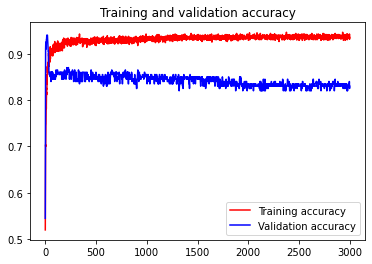

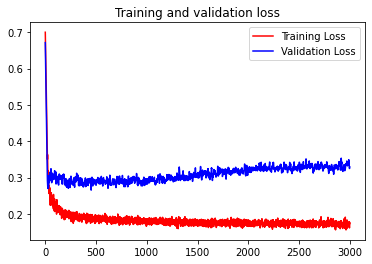

In [90]:
plot_loss_accuracy(history)

In [94]:
evaluate(model_1, x_train_1, y_train_1, x_test_1, y_test_1)

2/2 [==============================] - 0s 11ms/step - loss: 0.1779 - accuracy: 0.9300
Train Loss: 0.19593316316604614, Train Accuracy: 0.9179999828338623
Test Loss: 0.17792600393295288, Test Accuracy: 0.9300000071525574


## Add Regularization

In [95]:
model_2 = Sequential()
model_2.add(Dense(20, activation='relu', kernel_regularizer='l2', input_shape=input_shape))
model_2.add(Dense(20, activation='relu', kernel_regularizer='l2',))
model_2.add(Dense(1, activation='sigmoid', kernel_regularizer='l2'))

model_2.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_49 (Dense)            (None, 20)                60        
                                                                 
 dense_50 (Dense)            (None, 20)                420       
                                                                 
 dense_51 (Dense)            (None, 1)                 21        
                                                                 
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________


In [96]:
history = compile_and_fit(model_2, x_train_1, y_train_1)

Streaming output truncated to the last 5000 lines.
7/7 [==============================] - 0s 7ms/step - loss: 0.2340 - accuracy: 0.9312 - val_loss: 0.3381 - val_accuracy: 0.8800
Epoch 502/3000
7/7 [==============================] - 0s 7ms/step - loss: 0.2341 - accuracy: 0.9312 - val_loss: 0.3353 - val_accuracy: 0.8800
Epoch 503/3000
7/7 [==============================] - 0s 7ms/step - loss: 0.2344 - accuracy: 0.9300 - val_loss: 0.3347 - val_accuracy: 0.8800
Epoch 504/3000
7/7 [==============================] - 0s 7ms/step - loss: 0.2337 - accuracy: 0.9300 - val_loss: 0.3520 - val_accuracy: 0.8700
Epoch 505/3000
7/7 [==============================] - 0s 7ms/step - loss: 0.2351 - accuracy: 0.9287 - val_loss: 0.3751 - val_accuracy: 0.8600
Epoch 506/3000
7/7 [==============================] - 0s 7ms/step - loss: 0.2348 - accuracy: 0.9312 - val_loss: 0.3513 - val_accuracy: 0.8700
Epoch 507/3000
7/7 [==============================] - 0s 7ms/step - loss: 0.2342 - accuracy: 0.9287 - val_loss: 

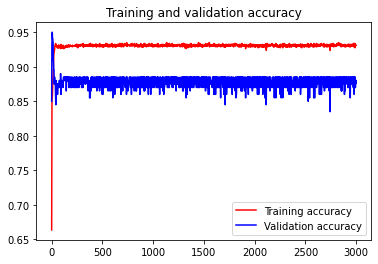

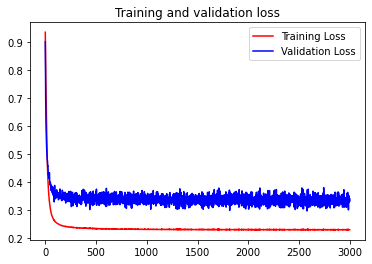

In [97]:
plot_loss_accuracy(history)

In [98]:
evaluate(model_2, x_train_1, y_train_1, x_test_1, y_test_1)

2/2 [==============================] - 0s 6ms/step - loss: 0.2094 - accuracy: 0.9450
Train Loss: 0.2508573830127716, Train Accuracy: 0.9210000038146973
Test Loss: 0.2094368040561676, Test Accuracy: 0.9449999928474426


## Early Stopping 

In [130]:
# from tensorflow.keras import l2
model_3 = Sequential()
model_3.add(Dense(20, activation='relu', kernel_regularizer='l2', input_shape=input_shape))
model_3.add(Dropout(0.5))
model_3.add(Dense(20, activation='relu', kernel_regularizer='l2'))
model_3.add(Dropout(0.2))
model_3.add(Dense(1, activation='sigmoid', kernel_regularizer='l2'))

model_3.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_70 (Dense)            (None, 20)                60        
                                                                 
 dropout_24 (Dropout)        (None, 20)                0         
                                                                 
 dense_71 (Dense)            (None, 20)                420       
                                                                 
 dropout_25 (Dropout)        (None, 20)                0         
                                                                 
 dense_72 (Dense)            (None, 1)                 21        
                                                                 
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________


In [131]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=300)
history = compile_and_fit(model_3, x_train_1, y_train_1, [early_stopping])

Epoch 1/3000
7/7 [==============================] - 1s 37ms/step - loss: 1.0074 - accuracy: 0.5063 - val_loss: 0.9946 - val_accuracy: 0.1750
Epoch 2/3000
7/7 [==============================] - 0s 6ms/step - loss: 0.9708 - accuracy: 0.5612 - val_loss: 0.8867 - val_accuracy: 0.9950
Epoch 3/3000
7/7 [==============================] - 0s 6ms/step - loss: 0.9204 - accuracy: 0.6150 - val_loss: 0.7977 - val_accuracy: 1.0000
Epoch 4/3000
7/7 [==============================] - 0s 6ms/step - loss: 0.8711 - accuracy: 0.6600 - val_loss: 0.7316 - val_accuracy: 1.0000
Epoch 5/3000
7/7 [==============================] - 0s 6ms/step - loss: 0.8338 - accuracy: 0.7063 - val_loss: 0.6835 - val_accuracy: 1.0000
Epoch 6/3000
7/7 [==============================] - 0s 6ms/step - loss: 0.7931 - accuracy: 0.7525 - val_loss: 0.6455 - val_accuracy: 1.0000
Epoch 7/3000
7/7 [==============================] - 0s 9ms/step - loss: 0.7690 - accuracy: 0.7713 - val_loss: 0.6155 - val_accuracy: 0.9950
Epoch 8/3000
7/7 [=

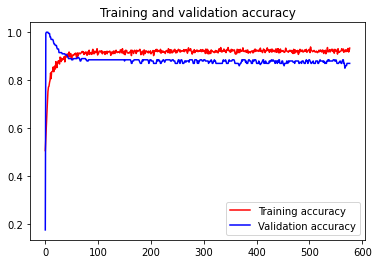

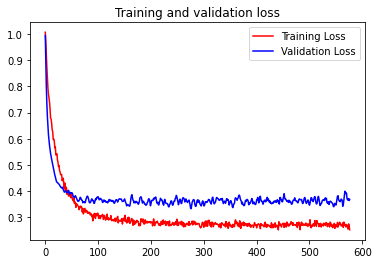

In [132]:
plot_loss_accuracy(history)

In [133]:
evaluate(model_3, x_train_1, y_train_1, x_test_1, y_test_1)

2/2 [==============================] - 0s 6ms/step - loss: 0.2223 - accuracy: 0.9350
Train Loss: 0.2664262354373932, Train Accuracy: 0.9179999828338623
Test Loss: 0.22229856252670288, Test Accuracy: 0.9350000023841858
